In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [31]:
import matplotlib.font_manager as fm
import platform

# 맑은 고딕 폰트의 위치(경로)
font_path = "C:/Windows/Fonts/malgun.ttf" # 경로 복붙 후 슬래쉬로 변경
font_prop=fm.FontProperties(fname=font_path)


In [5]:
df_sample = pd.read_csv("./06deep_learning/data/network_data.csv")
df_sample.head()

,고객ID,고객이름,동반인ID,주문메뉴
0,C0116,고객116,NaN,"['쫄면', '칼국수']"
1,C0169,고객169,NaN,"['순두부찌개', '된장찌개', '불고기']"
2,C0086,고객86,C0153,['쫄면']
3,C0104,고객104,C0163,"['순두부찌개', '된장찌개', '비빔밥']"
4,C0126,고객126,NaN,"['비빔밥', '김치찌개']"


In [8]:
# 고객id: 고객이름 매핑 딕셔너리 만들기
customer_dict=dict(zip(df_sample['고객ID'],df_sample['고객이름']))
customer_dict

{'C0116': '고객116',
 'C0169': '고객169',
 'C0086': '고객86',
 'C0104': '고객104',
 'C0126': '고객126',
 'C0184': '고객184',
 'C0181': '고객181',
 'C0154': '고객154',
 'C0081': '고객81',
 'C0199': '고객199',
 'C0149': '고객149',
 'C0058': '고객58',
 'C0042': '고객42',
 'C0187': '고객187',
 'C0176': '고객176',
 'C0107': '고객107',
 'C0177': '고객177',
 'C0027': '고객27',
 'C0144': '고객144',
 'C0072': '고객72',
 'C0123': '고객123',
 'C0132': '고객132',
 'C0005': '고객5',
 'C0140': '고객140',
 'C0048': '고객48',
 'C0049': '고객49',
 'C0114': '고객114',
 'C0138': '고객138',
 'C0045': '고객45',
 'C0031': '고객31',
 'C0078': '고객78',
 'C0164': '고객164',
 'C0047': '고객47',
 'C0028': '고객28',
 'C0089': '고객89',
 'C0119': '고객119',
 'C0170': '고객170',
 'C0150': '고객150',
 'C0004': '고객4',
 'C0093': '고객93',
 'C0069': '고객69',
 'C0180': '고객180',
 'C0143': '고객143',
 'C0021': '고객21',
 'C0030': '고객30',
 'C0200': '고객200',
 'C0139': '고객139',
 'C0092': '고객92',
 'C0159': '고객159',
 'C0088': '고객88',
 'C0195': '고객195',
 'C0076': '고객76',
 'C0053': '고객53',
 'C0033': '고객33',
 

In [22]:
# 고객네트워크 그래프 생성
G = nx.Graph()

for _, row in df_sample.iterrows():
        cust_id = row['고객ID']
        cust_name = row['고객이름']
        cust_label = f"{cust_name} ({cust_id})"
        
        companion_id = row['동반인ID'] # 동반인있는경우만 필터링
        
        if pd.notnull(companion_id):
            companion_name=customer_dict.get(companion_id, companion_id) # 왜 이것만 두개하지???? d0d
            companion_label = f"{companion_name} ({companion_id})"

            G.add_node(cust_label)
            G.add_node(companion_label)
            G.add_edge(cust_label, companion_label) # 여기 세줄로 그래프그려짐
        
# 중심성 분석        - 3가지 지표로 분석하기
degree_centrality = nx.degree_centrality(G)
betweenness_centrality=nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)




In [ ]:
# 연결중심성이 높은 순서대로 테이블 정렬
top_k = 10 # 상위 10
top_degree = sorted(degree_centrality.items(),key=lambda x:x[1], reverse=True)[:top_k]

result=[]
for node, degree in top_degree:
    result.append({
        "고객이름(고객ID)" : node,
        "연결중심성(Degree)": round(degree, 4),
        "매개중심성(Betweenness)": round(betweenness_centrality.get(node,0),4),
        "근접중심성(Closeness)": round(closeness_centrality.get(node,0),4)
    })
    
df_result=pd.DataFrame(result)    

df_result    

,고객이름(고객ID),연결중심성(Degree),매개중심성(Betweenness),근접중심성(Closeness)
0,고객106 (C0106),0.0515,0.0713,0.3050
1,고객133 (C0133),0.0464,0.0645,0.3065
2,고객153 (C0153),0.0412,0.0440,0.2840
3,고객163 (C0163),0.0412,0.0366,0.2904
4,고객100 (C0100),0.0412,0.0531,0.2953
5,고객114 (C0114),0.0412,0.0517,0.2900
6,고객195 (C0195),0.0412,0.0707,0.3031
7,고객24 (C0024),0.0361,0.0412,0.2866
8,고객170 (C0170),0.0361,0.0331,0.2771
9,고객183 (C0183),0.0361,0.0375,0.2870


In [13]:
## iterrows 잠깐 설명
for idx, row in df_sample.iloc[:2,:].iterrows():
    print(row['고객ID'])
    print(row['고객이름'])

C0116
고객116
C0169
고객169


#### 한사람을 중심으로 어느그룹과 연결된건지 볼  수 있음

- 연결중심성(Degree) : 직접 연결된 고객 수 비율, 동반 방문의 수나 무리가 많을 수록 높음
- 매개중심성(Betweenness) : 다른 그룹(고객집단) 사이의 중개역할해서 다양한 집단을 이어줄수록 비율이 높음
- 근접중심성(Closeness) : 전체 고객들과의 거리 평균의 역수로. 전체인원 중 얼마나 많이 연결(데려왔나)

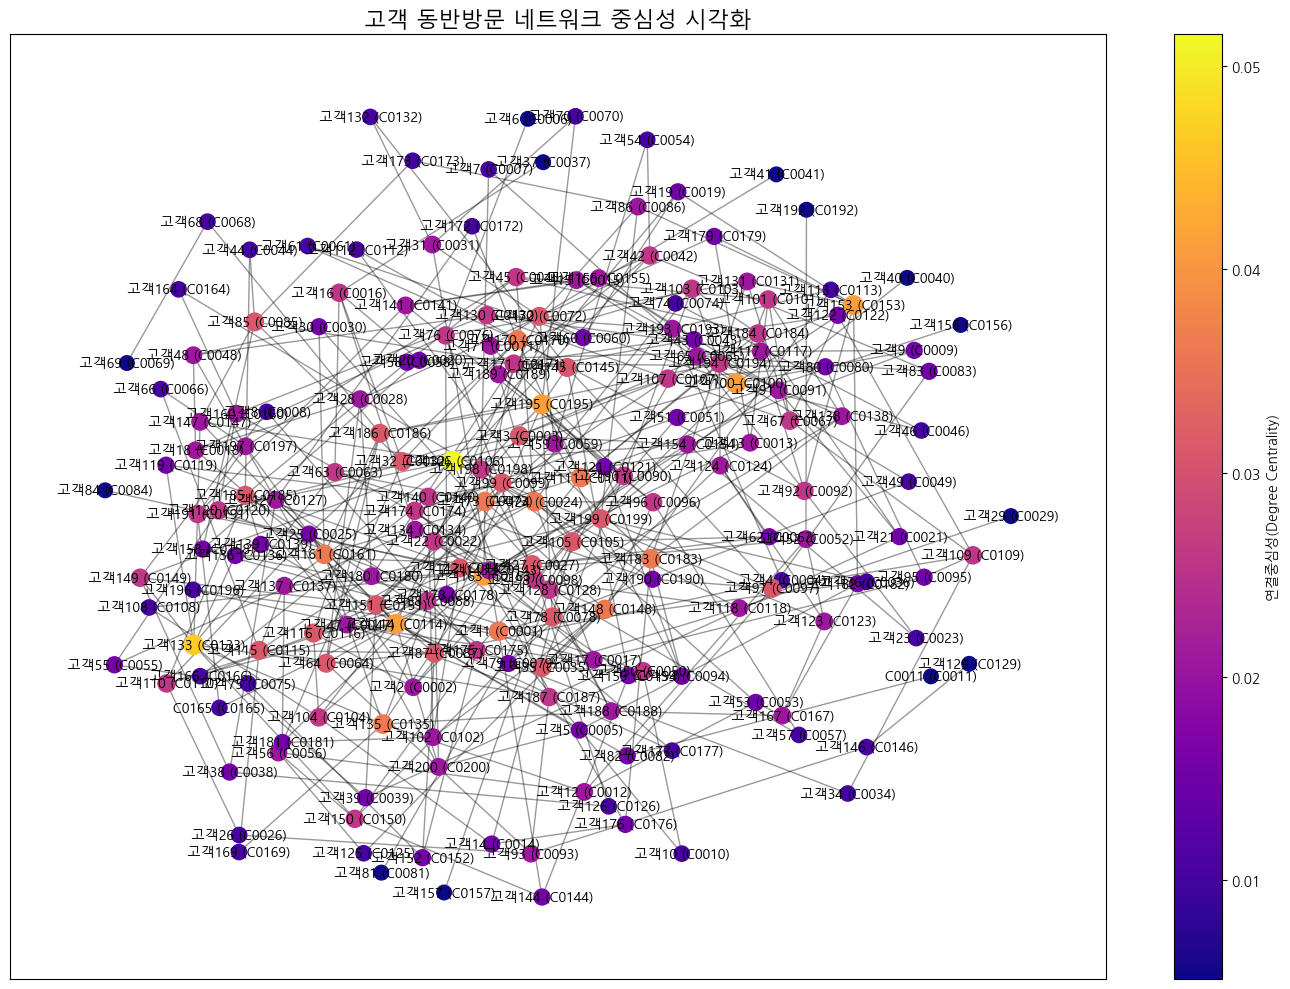

In [35]:
# 네트워크 X 통해서 시각화해보기
plt.rcParams['axes.unicode_minus']=False

# 노드 속성 설정 - 수치에 따라서 색변화있도록
node_colors=[degree_centrality.get(node, 0) for node in G.nodes]
node_sizes=[2000 * degree_centrality.get(node,0)+100 for node in G.nodes]

# 노드 위치계산
pos = nx.spring_layout(G, seed=42, k=0.5) # k는 노드간 평균거리(클수록 벌어짐)

plt.figure(figsize=(14,10))
nodes=nx.draw_networkx_nodes(
        G, pos, node_color=node_colors,
        node_size = node_sizes,
        cmap = plt.cm.plasma # 컬러세트 중 플라스마 선택
        )

# 엣지와 레이블 - d0d 순서는 상관없나
nx.draw_networkx_edges(G, pos, alpha=0.4) # alpha는 투명도
nx.draw_networkx_labels(G, pos, font_size=10, font_family=font_prop.get_name())
plt.colorbar(nodes, label="연결중심성(Degree Centrality)")
plt.title("고객 동반방문 네트워크 중심성 시각화", fontproperties=font_prop, fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()
